In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

# Load the data
First we're going to load in the data as in, and create a concatenation of the two sets, so all our feature operations are equally performed on both sets. We are using the hierachical index of pandas dataframes here.

In [6]:
_train = pd.read_csv('train.csv')
_test = pd.read_csv('test.csv')
_all = pd.concat({'train': _train, 'test': _test})

In [7]:
_all.head()

Age Cabin Embarked     Fare  \
test 0  34.5   NaN        Q   7.8292   
     1  47.0   NaN        S   7.0000   
     2  62.0   NaN        Q   9.6875   
     3  27.0   NaN        S   8.6625   
     4  22.0   NaN        S  12.2875   

                                                Name  Parch  PassengerId  \
test 0                              Kelly, Mr. James      0          892   
     1              Wilkes, Mrs. James (Ellen Needs)      0          893   
     2                     Myles, Mr. Thomas Francis      0          894   
     3                              Wirz, Mr. Albert      0          895   
     4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)      1          896   

        Pclass     Sex  SibSp  Survived   Ticket  
test 0       3    male      0       NaN   330911  
     1       3  female      1       NaN   363272  
     2       2    male      0       NaN   240276  
     3       3    male      0       NaN   315154  
     4       3  female      1       NaN  3101298

In [8]:
_all.tail()

Age Cabin Embarked   Fare  \
train 886  27.0   NaN        S  13.00   
      887  19.0   B42        S  30.00   
      888   NaN   NaN        S  23.45   
      889  26.0  C148        C  30.00   
      890  32.0   NaN        Q   7.75   

                                               Name  Parch  PassengerId  \
train 886                     Montvila, Rev. Juozas      0          887   
      887              Graham, Miss. Margaret Edith      0          888   
      888  Johnston, Miss. Catherine Helen "Carrie"      2          889   
      889                     Behr, Mr. Karl Howell      0          890   
      890                       Dooley, Mr. Patrick      0          891   

           Pclass     Sex  SibSp  Survived      Ticket  
train 886       2    male      0       0.0      211536  
      887       1  female      0       1.0      112053  
      888       3  female      1       0.0  W./C. 6607  
      889       1    male      0       1.0      111369  
      890       3    male      0       0.0      370376

In [12]:
_all.loc["test"].head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298


An overview of the initial features. In later section we will introduce new features, and remove some non-predictive features.

| Variable | Definition | Key | Comment |
|----------|------------------------------|---------------------------|--------------------------------------------------------------------------------------|
| PassengerId | |  |  |
| Survived | Survival (target) | 0 = No, 1 = Yes |  |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd | proxy for socio-economic class (resp. upper, middle, lower class) |
| Name |  |  |  |
| Sex | Sex |  |  |
| Age | Age in years |  | Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5 |
| SibSp | # of siblings/spouses aboard |  | sibling = (step)brother, (step)sister; spouse = husband, wife |
| Parch | # of parents/children aboard |  | parent = mother, father; child = (step)daughter, (step)son |
| Ticket | Ticket number |  |  |
| Fare | Passenger fare |  |  |
| Cabin | Cabin number |  |  |
| Embarked | Port of embarkation |  | C = Cherbourg; Q = Queenstown; S = Southampton |

# Data preprocessing
inspection, derive other features, normalisation

## Inspection of the data
Before altering the data, let's first take a look at what actually is in the data.

In [24]:
_all.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, (test, 0) to (train, 890)
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 133.6+ KB


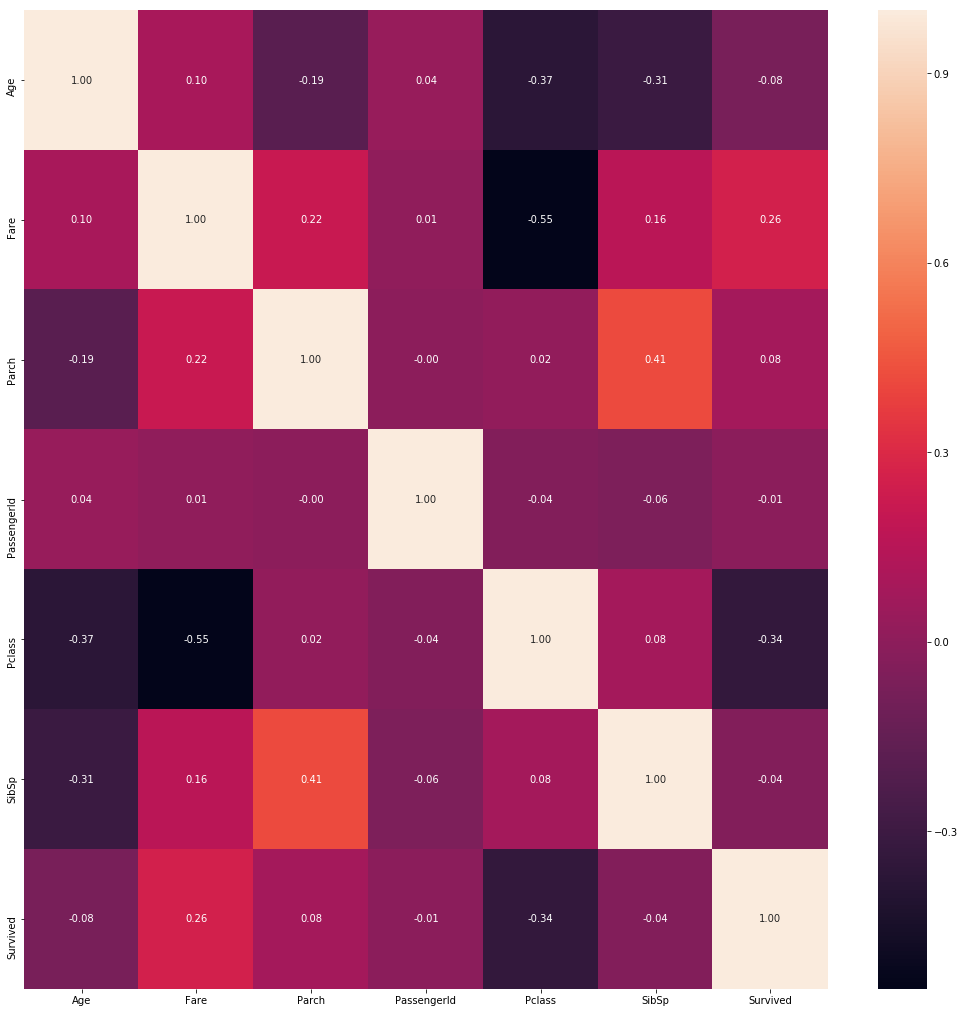

In [25]:
#sns.pairplot(_all.loc["train"])
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(_all.loc["train"].corr(), annot=True, fmt=".2f")
plt.show()

On first inspection, we have 12 features, of different sorts. The split on the data is 68% for training data, and 32 for test data.

We can already see some interesting patterns. Some of them probably not so useful (Fare vs. Pclass), some definitely more useful (Survived vs. Pclass).
Not all features are present in this correlation matrix, because they don't have the right type yet (i.e. Sex and Embarked).

But first we are going to check whether we are not missing values.

In [ ]:
## Filling the gaps

In [26]:
_all.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

So for 5 features we are missing values. Survived being the most important feature ;) For the other 4 features we will think of a strategy to deal with not having the information.


### Embark
First let's tackle the Embark problem. 

In [27]:
_all[_all['Embarked'].isnull()]

Age Cabin Embarked  Fare  \
train 61   38.0   B28      NaN  80.0   
      829  62.0   B28      NaN  80.0   

                                                Name  Parch  PassengerId  \
train 61                         Icard, Miss. Amelie      0           62   
      829  Stone, Mrs. George Nelson (Martha Evelyn)      0          830   

           Pclass     Sex  SibSp  Survived  Ticket  
train 61        1  female      0       1.0  113572  
      829       1  female      0       1.0  113572

For these two ladies we do not know where they embarked. Based on them having the same ticket number, and having paid the same fare, we just assume they embarked from the same harbour.
Since Southerhampton is the majority class, we'll go with that for the moment.

In [28]:
_all["Embarked"].fillna(value='S', inplace=True)

### Fare
The second minor incovenience is the missing fare for 1 passenger:

In [32]:
_all[_all['Fare'].isnull()]

,,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
test,152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


For convenience's sake, we impute the missing value from the median of fares for the same class and the same start location.

In [34]:
_all.loc[_all["PassengerId"] == 1044, "Fare"] = _all[(_all["Embarked"]=='S') & (_all["Pclass"]==3)].Fare.median()

### Age and Cabin
For the Age feature we can analoguously guesstimate the missing ages. But since there are significantly more values missing, and we suspect that age might be a more important predictor than Fare and Embark, we have to tread  a bit more carefully. In the next chapter we will first introduce a new feature (Salutation), which we will then use to estimate the missing ages.

For Cabin it is even harder to come up with sensible values. For this reason, we ignore the feature itself, but first generate some additional features based on the Cabin feature. If it is available of course... 

## New features

### Salutation (and age)
The first new feature that we take on is the Salutation feature. For every passenger we have the complete name, including salutation, maiden name, surname, and all other names. For Age this is not the case, but we can use Salutation to come up with a median age for a specific title.

In [112]:
_all["Salutation"] = _all.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [113]:
_all.head()

Age Cabin Embarked     Fare  \
test 0  34.5   NaN        Q   7.8292   
     1  47.0   NaN        S   7.0000   
     2  62.0   NaN        Q   9.6875   
     3  27.0   NaN        S   8.6625   
     4  22.0   NaN        S  12.2875   

                                                Name  Parch  PassengerId  \
test 0                              Kelly, Mr. James      0          892   
     1              Wilkes, Mrs. James (Ellen Needs)      0          893   
     2                     Myles, Mr. Thomas Francis      0          894   
     3                              Wirz, Mr. Albert      0          895   
     4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)      1          896   

        Pclass     Sex  SibSp  Survived   Ticket Salutation  
test 0       3    male      0       NaN   330911         Mr  
     1       3  female      1       NaN   363272        Mrs  
     2       2    male      0       NaN   240276         Mr  
     3       3    male      0       NaN   315154         Mr  
     4       3  female      1       NaN  3101298        Mrs

In [115]:
pd.crosstab(_all["Salutation"], _all["Sex"])

Sex,female,male
Salutation,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


Considering the values and counts of the new feature, we might want to collapse the feature, since many classes are severely underrepresented.

In [116]:
_all['Salutation'] = _all['Salutation'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
_all['Salutation'] = _all['Salutation'].replace('Mlle', 'Miss')
_all['Salutation'] = _all['Salutation'].replace('Ms', 'Miss')
_all['Salutation'] = _all['Salutation'].replace('Mme', 'Mrs')
#df['Salutation'] = pd.factorize(df['Salutation'])[0]

Age Cabin Embarked     Fare  \
test 0  34.5   NaN        Q   7.8292   
     1  47.0   NaN        S   7.0000   
     2  62.0   NaN        Q   9.6875   
     3  27.0   NaN        S   8.6625   
     4  22.0   NaN        S  12.2875   

                                                Name  Parch  PassengerId  \
test 0                              Kelly, Mr. James      0          892   
     1              Wilkes, Mrs. James (Ellen Needs)      0          893   
     2                     Myles, Mr. Thomas Francis      0          894   
     3                              Wirz, Mr. Albert      0          895   
     4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)      1          896   

        Pclass     Sex  SibSp  Survived   Ticket Salutation  
test 0       3    male      0       NaN   330911         Mr  
     1       3  female      1       NaN   363272        Mrs  
     2       2    male      0       NaN   240276         Mr  
     3       3    male      0       NaN   315154         Mr  
     4       3  female      1       NaN  3101298        Mrs

In [118]:
pd.crosstab(_all["Salutation"], _all["Sex"])

Sex,female,male
Salutation,,
Master,0,61
Miss,264,0
Mr,0,757
Mrs,198,0
Rare,4,25


This looks better. It yields a more broad generalisation over Age and Sex, but with the whole 'women and children first' thing going on, this seems coarse enough to work with.

Now we are going to use Salutation for filling of all missing ages, again, by taking the median of the group.

In [125]:
for salutation in _all.Salutation.unique():
    _all.loc[(_all["Salutation"]==salutation) & np.isnan(_all["Age"]), "Age" ] = _all[_all["Salutation"]==salutation].Age.median()

## Cabin-based features
The last feature with missing values is Cabin. Since its values map for places inside of the Titanic, they contain valuable information. Especially if you consider that the lowest decks were evacuated first, and that the higher decks were more expensive, and therefore contained more of the upperclass people. Even starboard and port are encoded in the features. To deflate this feature, and make the information accessible to a classifier, we introduce three new features based on, and instead of, Cabin.

### Deck

In [131]:
_all["Deck"] = "Unknown"
_all.loc[pd.notnull(_all["Deck"]), "Deck"] = _all["Cabin"].str[0]

In [132]:
_all.loc[pd.notnull(_all["Cabin"])].head()

Age            Cabin Embarked      Fare  \
test 12  23.0              B45        S   82.2667   
     14  47.0              E31        S   61.1750   
     24  48.0  B57 B59 B63 B66        C  262.3750   
     26  22.0              B36        C   61.9792   
     28  41.0              A21        S   30.5000   

                                                      Name  Parch  \
test 12      Snyder, Mrs. John Pillsbury (Nelle Stevenson)      0   
     14  Chaffee, Mrs. Herbert Fuller (Carrie Constance...      0   
     24    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)      3   
     26                       Ostby, Miss. Helene Ragnhild      1   
     28                            Brady, Mr. John Bertram      0   

         PassengerId  Pclass     Sex  SibSp  Survived       Ticket Salutation  \
test 12          904       1  female      1       NaN        21228        Mrs   
     14          906       1  female      1       NaN  W.E.P. 5734        Mrs   
     24          916       1  female      1       NaN     PC 17608        Mrs   
     26          918       1  female      0       NaN       113509       Miss   
     28          920       1    male      0       NaN       113054         Mr   

         CabinSide Deck  
test 12  Starboard    B  
     14  Starboard    E  
     24       Port    B  
     26       Port    B  
     28  Starboard    A

### Cabin side
Either starboard or port

In [126]:
_all["CabinSide"] = "Unknown"
_all.loc[pd.notnull(_all["Cabin"]) & _all["Cabin"].str[-1].isin(["1", "3", "5", "7", "9"]),"CabinSide"] = "Starboard"
_all.loc[pd.notnull(_all["Cabin"]) & _all["Cabin"].str[-1].isin(["0", "2", "4", "6", "8"]),"CabinSide"] = "Port"

### Room number
With a larger room number meaning further to the back

- Not implemented yet

## Group-based features
Since a lot of passengers went together with their family and staff, and for obvious reasons did not want to use the life boats when the others could not, we imagine that there might also be some information in group-based features.
For example the size of the family, the number of people with the same ticket number, and so on.

### Family size

In [133]:
_all["FamilySize"] = _all.Parch + _all.SibSp + 1

### Ticket group size

In [142]:
ticket_frequency = {}
for t in _all.Ticket.unique():
    ticket_frequency[t] = 0
for t in _all.Ticket:
    ticket_frequency[t] += 1

_all["TicketGroupSize"] = _all["Ticket"].apply( lambda x: ticket_frequency[x])

### Normalised ticket fare
If people travel together on 1 ticket, the fare indicates the total price.

In [150]:
fare_frequency = {}
for f in _all.Fare:
    f_val = round(f)
    fare_frequency[f_val] = fare_frequency.get(f_val, 0) + 1

_all["NormFare"] = _all["Fare"]/_all["TicketGroupSize"]

normfare_frequency = {}
for f in _all.NormFare:
    f_val = round(f)
    normfare_frequency[f_val] = normfare_frequency.get(f_val, 0) + 1

In [151]:
normfare_frequency

{0: 17,
 3: 1,
 4: 25,
 5: 58,
 6: 56,
 7: 157,
 8: 359,
 9: 62,
 10: 90,
 11: 8,
 12: 22,
 13: 106,
 14: 18,
 15: 10,
 16: 5,
 20: 4,
 21: 2,
 23: 4,
 24: 2,
 25: 6,
 26: 46,
 27: 40,
 28: 34,
 29: 9,
 30: 29,
 31: 9,
 32: 5,
 33: 2,
 34: 6,
 35: 7,
 36: 11,
 37: 7,
 38: 10,
 39: 4,
 40: 12,
 41: 8,
 42: 8,
 44: 6,
 45: 4,
 46: 8,
 49: 3,
 50: 7,
 51: 3,
 53: 4,
 55: 4,
 67: 2,
 68: 2,
 83: 3,
 128: 4}

In [218]:
_all.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, (test, 0) to (train, 890)
Data columns (total 18 columns):
Age                1309 non-null float64
Cabin              295 non-null object
Embarked           1309 non-null int64
Fare               1309 non-null float64
Name               1309 non-null object
Parch              1309 non-null int64
PassengerId        1309 non-null int64
Pclass             1309 non-null int64
Sex                1309 non-null int64
SibSp              1309 non-null int64
Survived           891 non-null float64
Ticket             1309 non-null object
Salutation         1309 non-null int64
CabinSide          1309 non-null int64
Deck               1309 non-null int64
FamilySize         1309 non-null int64
TicketGroupSize    1309 non-null int64
NormFare           1309 non-null float64
dtypes: float64(4), int64(11), object(3)
memory usage: 195.0+ KB


In [183]:
_all["Sex"] = pd.factorize(_all["Sex"])[0]
_all["Deck"] = pd.factorize(_all["Deck"])[0]
_all["Salutation"] = pd.factorize(_all["Salutation"])[0]
_all["CabinSide"] = pd.factorize(_all["CabinSide"])[0]
_all["Embarked"] = pd.factorize(_all["Embarked"])[0]

So now we have the following features:
    

| Variable | Definition | Key | Comment |
|----------|------------------------------|---------------------------|--------------------------------------------------------------------------------------|
| Salutation | |  |  |
| Deck | |  |  |
| CabinSide | |  |  |
| FamilySize | |  |  |
| TicketGroupSize | |  |  |
| NormFare | |  |  |
| Survived | Survival (target) | 0 = No, 1 = Yes |  |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd | proxy for socio-economic class (resp. upper, middle, lower class) |
| Name |  |  |  |
| Sex | Sex |  |  |
| Age | Age in years |  | Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5 |
| SibSp | # of siblings/spouses aboard |  | sibling = (step)brother, (step)sister; spouse = husband, wife |
| Parch | # of parents/children aboard |  | parent = mother, father; child = (step)daughter, (step)son |
| Ticket | Ticket number |  |  |
| Fare | Passenger fare |  |  |
| Cabin | Cabin number |  |  |
| Embarked | Port of embarkation |  | C = Cherbourg; Q = Queenstown; S = Southampton |

In [ ]:
scaler = preprocessing.MinMaxScaler()

In [215]:
_all["Age"] = scaler.fit_transform(_all[["Age"]])
_all["Fare"] = scaler.fit_transform(_all[["Fare"]])
_all["NormFare"] = scaler.fit_transform(_all[["NormFare"]])

# Baselines

## Everybody dies. Yes Rose, even you!

In [221]:
baseline1 = pd.DataFrame(_test["PassengerId"])
baseline1["Survived"] = 0
baseline1.to_csv("baseline1.csv", index=False)

Entering the competition with the everybody dies baseline. Seems to be everybody's baseline :-)
Coming in at a fine 9348th place with 0.62678.

## k-NN baseline

In [222]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [223]:
k_range = range(1,31)
param_grid = dict(n_neighbors=list(k_range), weights=["uniform", "distance"])

In [224]:
knn = KNeighborsClassifier(n_neighbors=5)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [225]:
_all.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Salutation',
       'CabinSide', 'Deck', 'FamilySize', 'TicketGroupSize', 'NormFare'],
      dtype='object')

In [226]:
features = ['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Salutation', 'CabinSide', 'Deck', 'FamilySize', 'TicketGroupSize', 'NormFare']

In [232]:
grid.fit(_all.loc["train"][features], _all.loc["train"]["Survived"])

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [234]:
grid.best_score_

0.78002244668911336

In [235]:
grid.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

In [239]:
knn = KNeighborsClassifier(n_neighbors=grid.best_params_.get('n_neighbors', 5), weights=grid.best_params_.get('weights', 'distance'))
knn.fit(_all.loc["train"][features], _all.loc["train"]["Survived"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='distance')

In [241]:
knn_predictions = knn.predict(_all.loc["test"][features])

In [247]:
knn_predictions.sum()

180.0

In [255]:
knn_predictions.astype(int)

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0,

In [256]:
baseline2 = pd.DataFrame({"PassengerId": _all.loc["test"]["PassengerId"], "Survived": knn_predictions.astype(int)})
baseline2.to_csv("baseline2a.csv", index=False)

"You advanced 462 places on the leaderboard!
Your submission scored 0.71291, which is an improvement of your previous score of 0.62679. "

## Random Forest baseline

In [257]:
from sklearn.ensemble import RandomForestClassifier

In [258]:
n_range = range(10, 100, 10)
param_grid = dict(n_estimators=list(n_range), criterion = ['gini', 'entropy'])
rfc = RandomForestClassifier(n_estimators=20)
grid = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy')
grid.fit(_all.loc["train"][features], _all.loc["train"]["Survived"])
print(grid.best_score_ , grid.best_params_)

0.828282828283 {'criterion': 'entropy', 'n_estimators': 20}


In [260]:
rfc = RandomForestClassifier(n_estimators=grid.best_params_.get('_estimators', 20), criterion=grid.best_params_.get('criterion', 'entropy'))
rfc.fit(_all.loc["train"][features], _all.loc["train"]["Survived"])
rfc_predictions = rfc.predict(_all.loc["test"][features])

In [261]:
baseline3 = pd.DataFrame({"PassengerId": _all.loc["test"]["PassengerId"], "Survived": rfc_predictions.astype(int)})
baseline3.to_csv("baseline3.csv", index=False)

"You advanced 3,389 places on the leaderboard!
Your submission scored 0.77511, which is an improvement of your previous score of 0.71291. Great job!"

## XGBoost baseline

In [277]:
import xgboost as xgb

In [278]:
xgb_model = xgb.XGBClassifier()

In [288]:
parameters = {'nthread':[1], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

In [289]:
from sklearn.cross_validation import *
clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(_all.loc["train"]["Survived"], n_folds=5, shuffle=True), 
                   scoring='accuracy',
                   verbose=2, refit=True)

In [293]:
bst = clf.fit(_all.loc["train"][features], _all.loc["train"]["Survived"])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=1000, nthread=1, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=1000, nthread=1, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=1000, nthread=1, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=1000, nthread=1, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=1000, nthread=1, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[

[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.5s finished


In [294]:
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Raw AUC score: 0.840628507295
colsample_bytree: 0.7
learning_rate: 0.05
max_depth: 6
min_child_weight: 11
missing: -999
n_estimators: 1000
nthread: 1
objective: 'binary:logistic'
seed: 1337
silent: 1
subsample: 0.8


In [311]:
best_parameters

{'colsample_bytree': [0.7],
 'learning_rate': [0.05],
 'max_depth': [6],
 'min_child_weight': [11],
 'missing': [-999],
 'n_estimators': [1000],
 'nthread': [1],
 'objective': ['binary:logistic'],
 'seed': [1337],
 'silent': [1],
 'subsample': [0.8]}

In [319]:
xgb_model = xgb.XGBClassifier(nthread=1, objective='binary:logistic', learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=1000, subsample=0.8, colsample_bytree=0.7)

In [320]:
xgb_model.fit(_all.loc["train"][features], _all.loc["train"]["Survived"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=6, min_child_weight=11, missing=-999, n_estimators=1000,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [321]:
xgb_predictions = xgb_model.predict(_all.loc["test"][features])

In [322]:
baseline4 = pd.DataFrame({"PassengerId": _all.loc["test"]["PassengerId"], "Survived": xgb_predictions.astype(int)})
baseline4.to_csv("baseline4.csv", index=False)

"Your Best Entry
Your submission scored 0.76555, which is not an improvement of your best score. Keep trying!"

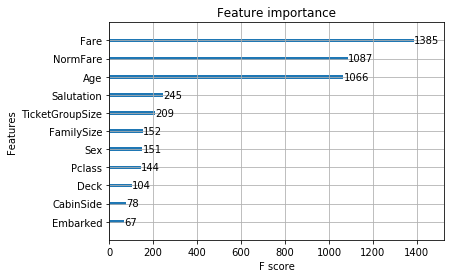

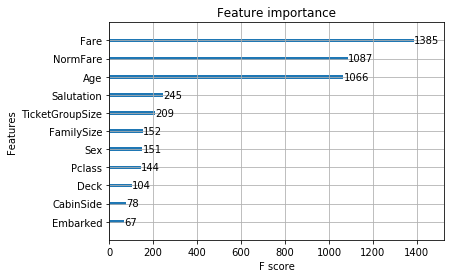

In [325]:
xgb.plot_importance(xgb_model)
plt.show()

In [185]:
_all.Salutation.corr(_all.Survived)

0.4059210645128748

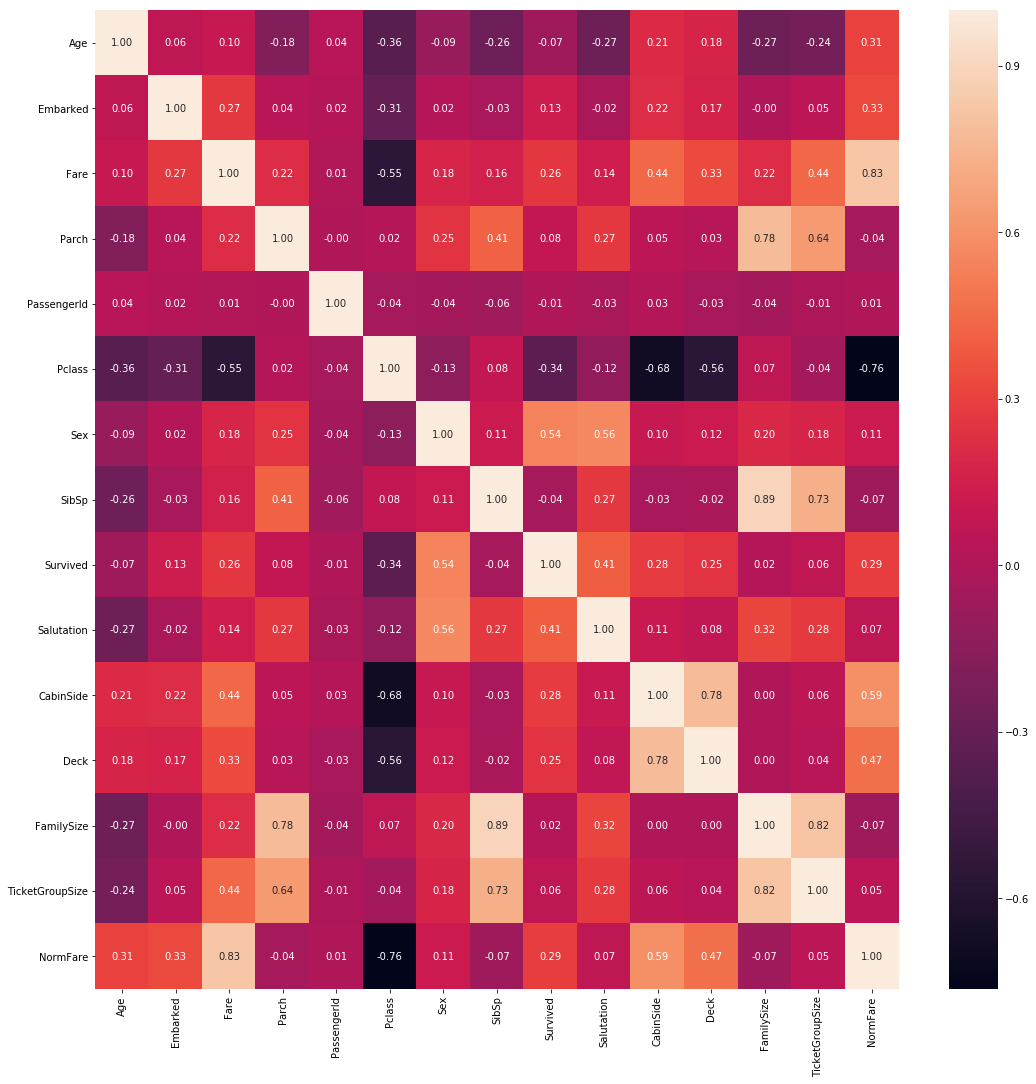

In [219]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(_all.loc["train"].corr(), annot=True, fmt=".2f")
plt.show()

In [ ]:
for df in [all_original]:
    df.loc[df["Age"] <= 9, "AgeGroup"] = 0
    df.loc[(df["Age"] > 9) & (df["Age"] <= 19), "AgeGroup"] = 1
    df.loc[(df["Age"] > 19) & (df["Age"] <= 29), "AgeGroup"] = 2
    df.loc[(df["Age"] > 29) & (df["Age"] <= 39), "AgeGroup"] = 3
    df.loc[(df["Age"] > 29) & (df["Age"] <= 39), "AgeGroup"] = 3
    df.loc[df["Age"] > 39, "AgeGroup"] = 4

In [ ]:
for df in [all_original]:
    df.loc[df["Fare"] <= 7.75, "FareGroup"] = 0
    df.loc[(df["Fare"] > 7.75) & (df["Fare"] <= 7.91), "FareGroup"] = 1
    df.loc[(df["Fare"] > 7.91) & (df["Fare"] <= 9.841), "FareGroup"] = 2
    df.loc[(df["Fare"] > 9.841) & (df["Fare"] <= 14.454), "FareGroup"] = 3   
    df.loc[(df["Fare"] > 14.454) & (df["Fare"] <= 24.479), "FareGroup"] = 4
    df.loc[(df["Fare"] >24.479) & (df["Fare"] <= 31), "FareGroup"] = 5   
    df.loc[(df["Fare"] > 31) & (df["Fare"] <= 69.487), "FareGroup"] = 6
    df.loc[df["Fare"] > 69.487, "FareGroup"] = 7

In [ ]:
all_original.head()